## Task 2

In [10]:
using Pkg
cd("C:\\Users\\patsc\\Documents\\Project2\\Samuel-Dick__Patrick-Schmidt-2504-2023-PROJECT2")
Pkg.activate(".")
include("..\\src\\jackson_network.jl")
include("..\\src\\simulation_engine.jl")
include("..\\src\\computation.jl")

  Activating new project at `C:\Users\patsc\Documents\Project2\Samuel-Dick__Patrick-Schmidt-2504-2023-PROJECT2`


steady_state_q_lengths (generic function with 1 method)

For this task we were required to determine the theoretical values for the the total steady state mean queue lengths for varying values of $\rho^*$ by utilising the formula provided in the task. This stated that for queue $i$, the mean queue length was give by $$\frac
{\rho_i}{1-\rho_i}.$$

The code used for this task can be found in <code>computation.jl</code>. This begines with the two functions from the task; <code>maximal_alpha_scaling()</code> and <code>set_scenario()</code>. 

From here, a function was created in order to impliment the above formula. 

In [2]:
mean_steady_state_queue_size(ρ) = ρ/(1-ρ) 

mean_steady_state_queue_size (generic function with 1 method)

From here, we add the <code>steady_state_q_lengths()</code> function. This involves determining the $\lambda$ vector which represents the arival rate for each node. We are then able to calculate the $\rho$ vector through the formula $$\rho_i = \frac{\lambda_i}{R\mu_i}$$

In [11]:
function steady_state_q_lengths(net::NetworkParameters)
    ρ_grid = 0.1:0.01:0.9
    #initialise steady state queue vector
    steady_state_q = [] 
    #iterate through the values of ρ in ρ_grid
    for i in ρ_grid
        new_sen = set_scenario(net, i)
        #determine λ vector
        λ_arr = (I - new_sen.P') \ new_sen.α_vector
        #determine ρ vector (note that R = 1)
        ρ_arr = λ_arr ./ new_sen.μ_vector 
        append!(steady_state_q, sum(mean_steady_state_queue_size.(ρ_arr)))
    end
    return steady_state_q
end 

steady_state_q_lengths (generic function with 1 method)

Below we will run the above code for each scenario. 

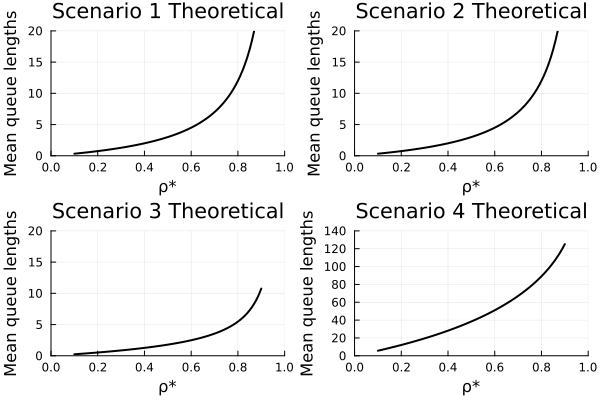

In [31]:
#For scenario1
ρ_grid = 0.1:0.01:0.9

p1 = plot(ρ_grid, steady_state_q_lengths(scenario1), 
xlabel = "ρ*", ylabel = "Mean queue lengths", title = "Scenario 1 Theoretical", 
label = false, lw = 2, c = :black, xlim = (0,1),ylim=(0,20)) 

#For scenario2
p2 = plot(ρ_grid, steady_state_q_lengths(scenario2), 
xlabel = "ρ*", ylabel = "Mean queue lengths", title = "Scenario 2 Theoretical",
label = false, lw = 2, c = :black, xlim = (0,1),ylim=(0,20)) 

#For scenario3
p3 = plot(ρ_grid, steady_state_q_lengths(scenario3), 
xlabel = "ρ*", ylabel = "Mean queue lengths", title = "Scenario 3 Theoretical",
label = false, lw = 2, c = :black, xlim = (0,1),ylim=(0,20)) 

#For scenario4
p4 = plot(ρ_grid, steady_state_q_lengths(scenario4), 
xlabel = "ρ*", ylabel = "Mean queue lengths", title = "Scenario 4 Theoretical",
label = false, lw = 2, c = :black, xlim = (0,1),ylim=(0,140)) 

plot(p1, p2, p3, p4)
